<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
%pip install seaborn

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline


<details>
    <summary>Click here for Solution</summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
```

</details>


### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [ ]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [2]:
# Load dataset WITHOUT header
df = pd.read_csv("medical_insurance_dataset.csv", header=None)

df.head(10)


,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


<details>
    <summary>Click here for Solution</summary>

```python
df = pd.read_csv(path, header=None)
print(df.head(10))
```

</details>


Add the headers to the dataframe, as mentioned in the project scenario. 


In [3]:
# Assign correct column names
df.columns = [
    "age",
    "gender",
    "bmi",
    "no_of_children",
    "smoker",
    "region",
    "charges"
]


# Show first 10 rows
df.head(10)


,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


<details>
    <summary>Click here for Solution</summary>

```python
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
```

</details>


Now, replace the '?' entries with 'NaN' values.


In [4]:
# Replace placeholder missing-value markers ('?') with actual NaN values.
# This allows pandas to correctly recognize and handle missing data.
df = df.replace("?", np.nan)


<details>
    <summary>Click here for Solution</summary>

```python
df.replace('?', np.nan, inplace = True)
```

</details>


# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [5]:
# Display summary information about the dataframe, including:
# - column names
# - total entries per column
# - number of non-null (non-NaN) values
# - data types
#
# This helps identify which columns contain missing data
# and whether any columns need type corrections.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


<details>
    <summary>Click here for Solution</summary>

```python
print(df.info())
```

</details>


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [6]:
# -------------------------------
# HANDLE MISSING VALUES
# -------------------------------

# Continuous numeric attributes:
# age, bmi, no_of_children, charges
# → Replace missing values with the MEAN of each column.
continuous_cols = ["age", "bmi", "no_of_children", "charges"]

for col in continuous_cols:
    # Compute the mean of the column (ignoring NaNs)
    mean_value = df[col].astype(float).mean()
    
    # Replace NaN values with the computed mean
    df[col] = df[col].astype(float).fillna(mean_value)


# Categorical attributes:
# gender, smoker, region
# → Replace missing values with the MODE (most frequent value).
categorical_cols = ["gender", "smoker", "region"]

for col in categorical_cols:
    # Determine the most common value in the column
    mode_value = df[col].mode()[0]
    
    # Replace missing values with the mode
    df[col] = df[col].fillna(mode_value)


# -------------------------------
# UPDATE DATA TYPES
# -------------------------------

# Convert continuous columns to numeric (float or int)
df["age"] = df["age"].astype(int)
df["bmi"] = df["bmi"].astype(float)
df["no_of_children"] = df["no_of_children"].astype(int)
df["charges"] = df["charges"].astype(float)

# Convert categorical columns to integer types
df["gender"] = df["gender"].astype(int)
df["smoker"] = df["smoker"].astype(int)
df["region"] = df["region"].astype(int)


# -------------------------------
# VERIFY THE UPDATE
# -------------------------------
# Displays the column types and counts of non-null values,
# useful for confirming that data cleaning is successful.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int32  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int32  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int32  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(5)
memory usage: 97.6 KB


<details>
    <summary>Click here for Solution</summary>

```python
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())
```

</details>


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [7]:
# ----------------------------------------
# ROUND CHARGES TO 2 DECIMAL PLACES
# ----------------------------------------

# The 'charges' column contains floating-point values
# with many decimals. For consistency and readability,
# round all values to 2 decimal places.
df["charges"] = df["charges"].round(2)

# Confirm the update by printing the first 5 rows
df.head(10)


,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86
5,31,1,25.740,0,0,4,3756.62
6,46,1,33.440,1,0,4,8240.59
7,37,1,27.740,3,0,1,7281.51
8,37,2,29.830,2,0,2,6406.41
9,60,1,25.840,0,0,1,28923.14


<details>
    <summary>Click here for Solution</summary>

```python
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())
```
</details>


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


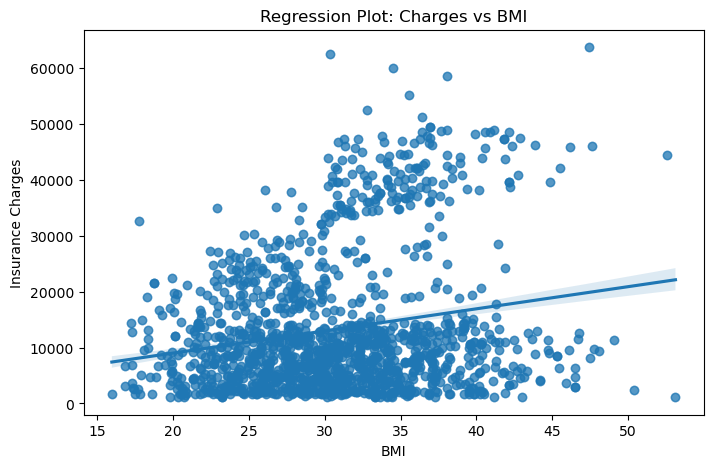

In [8]:
# -------------------------------------------
# REGRESSION PLOT: charges vs bmi
# -------------------------------------------
# This plot visualizes the relationship between BMI (independent variable)
# and insurance charges (dependent variable). The regression line shows the
# general trend, helping identify whether a linear relationship exists.

plt.figure(figsize=(8, 5))
sns.regplot(x="bmi", y="charges", data=df, scatter_kws={"alpha":0.5})
plt.title("Regression Plot: Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.show()


<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)
```
</details>


Implement the box plot for `charges` with respect to `smoker`.


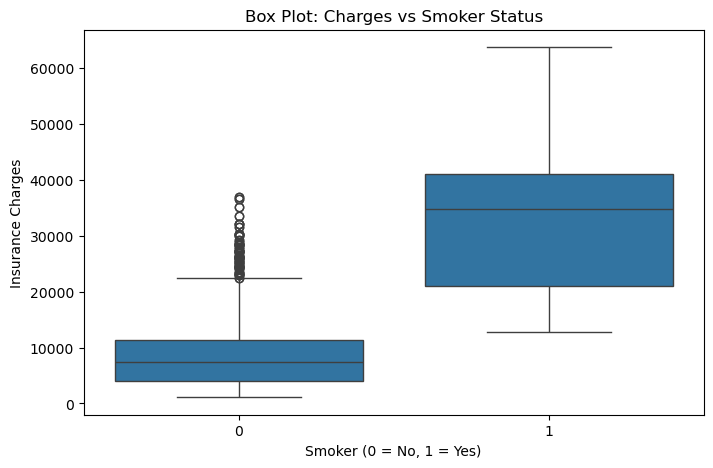

In [9]:
# -------------------------------------------
# BOX PLOT: charges vs smoker
# -------------------------------------------
# This plot compares insurance charges between smokers and non-smokers.
# Smokers typically show much higher charges due to health risks.
# The box plot highlights differences in median, quartiles, and outliers.

plt.figure(figsize=(8, 5))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Box Plot: Charges vs Smoker Status")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Insurance Charges")
plt.show()


<details>
    <summary>Click here for Solution</summary>

```python
sns.boxplot(x="smoker", y="charges", data=df)
```
</details>


Print the correlation matrix for the dataset.


                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


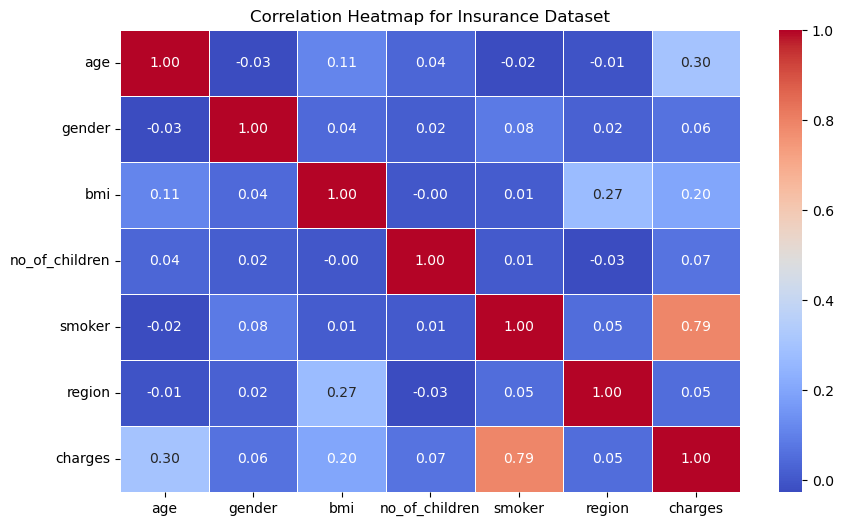

In [10]:
# ---------------------------------------------
# CORRELATION MATRIX
# ---------------------------------------------
# This computes pairwise correlations between all numerical variables
# in the dataset. High positive/negative values indicate strong linear
# relationships. Useful for feature selection before model building.

corr_matrix = df.corr()
print(corr_matrix)

# ---------------------------------------------------------
# CORRELATION HEATMAP
# ---------------------------------------------------------
# This visualizes the correlation matrix using a color-coded grid.
# Darker colors represent stronger positive or negative correlations.
# It helps identify which variables have the strongest impact on others,
# particularly useful for selecting features for predictive modeling.

plt.figure(figsize=(10, 6))

sns.heatmap(
    df.corr(),            # correlation matrix
    annot=True,           # display correlation values on the grid
    cmap="coolwarm",      # color palette (blue = negative, red = positive)
    fmt=".2f",            # format for numeric labels
    linewidths=0.5        # thin lines between squares
)

plt.title("Correlation Heatmap for Insurance Dataset")
plt.show()



<details>
    <summary>Click here for Solution</summary>

```python
print(df.corr())
```
</details>


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [11]:
# ------------------------------------------------
# MODEL: Predict charges using ONLY smoker status
# ------------------------------------------------

# Define feature (X) and target (y)
# smoker must be reshaped into a 2D array for sklearn
X = df[["smoker"]]
y = df["charges"]

# Split dataset into training and testing subsets
# test_size=0.2 means 20% of data is used for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict charges for the test set
y_pred = model.predict(X_test)

# Calculate the R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Display the R² value
print("R² score for model using only 'smoker' as predictor:", r2)


R² score for model using only 'smoker' as predictor: 0.5991357971873228


<details>
    <summary>Click here for Solution</summary>

```python
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))
```
</details>


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [12]:
# ------------------------------------------------------------
# LINEAR REGRESSION MODEL USING ALL ATTRIBUTES
# ------------------------------------------------------------

# Define input features (X) and target (y)
X = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
y = df["charges"]

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict charges on the test set
y_pred = model.predict(X_test)

# Compute R² score
r2 = r2_score(y_test, y_pred)

# Display the R² score
print("R² score using ALL attributes:", r2)


R² score using ALL attributes: 0.7395785011132648


<details>
    <summary>Click here for Solution</summary>

```python
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))
```
</details>


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [13]:
# ------------------------------------------------------------
# POLYNOMIAL REGRESSION PIPELINE (SCALER + POLY + LINEAR REG)
# ------------------------------------------------------------

# Use the same input features
X = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
y = df["charges"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build the pipeline:
# 1. Scale the features
# 2. Generate polynomial terms (degree=2 captures interactions)
# 3. Fit linear regression on expanded feature set
poly_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("linreg", LinearRegression())
])

# Train the model
poly_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_poly = poly_pipeline.predict(X_test)

# Compute R² score
r2_poly = r2_score(y_test, y_pred_poly)

print("R² score using Polynomial Regression Pipeline:", r2_poly)


R² score using Polynomial Regression Pipeline: 0.8339570484408595


<details>
    <summary>Click here for Solution</summary>

```python
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))
```
</details>


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [14]:
# -----------------------------------------------------------
# TRAIN–TEST SPLIT (80% training, 20% testing)
# -----------------------------------------------------------
# X contains all feature columns
X = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]

# y contains the target variable
y = df["charges"]

# Split into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (2217, 6)
Testing set size: (555, 6)


<details>
    <summary>Click here for Solution</summary>

```python
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)
```
</details>


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [15]:
# -----------------------------------------------------------
# RIDGE REGRESSION WITH α = 0.1
# -----------------------------------------------------------
# Ridge helps reduce overfitting by adding L2 regularization.
# This is useful when variables have multicollinearity.

ridge_model = Ridge(alpha=0.1)

# Train the model using only training data
ridge_model.fit(X_train, y_train)

# Predict on testing data
ridge_pred = ridge_model.predict(X_test)

# Compute R² score for model performance
ridge_r2 = r2_score(y_test, ridge_pred)

print("R² score for Ridge Regression (alpha = 0.1):", ridge_r2)


R² score for Ridge Regression (alpha = 0.1): 0.7395716463230875


<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))
```
</details>


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [16]:
# -----------------------------------------------------------
# POLYNOMIAL (DEGREE 2) + RIDGE REGRESSION
# -----------------------------------------------------------
# Step 1: Create polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform training and test sets
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Train Ridge model on the transformed features
ridge_poly_model = Ridge(alpha=0.1)
ridge_poly_model.fit(X_train_poly, y_train)

# Step 3: Predict and evaluate
ridge_poly_pred = ridge_poly_model.predict(X_test_poly)

# Compute R² score for evaluation
ridge_poly_r2 = r2_score(y_test, ridge_poly_pred)

print("R² score for Polynomial (degree=2) + Ridge Regression:", ridge_poly_r2)


R² score for Polynomial (degree=2) + Ridge Regression: 0.8339389493630686


<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))
```
</details>


# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)



## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>
